So validation accuracy stalls at 40 percentage 
Let's try with augmentation and regularization

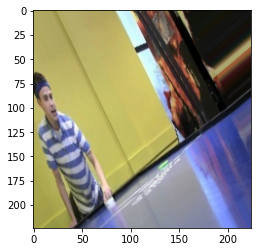

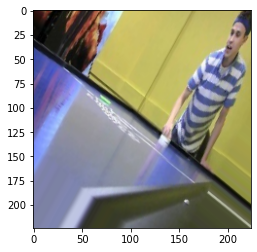

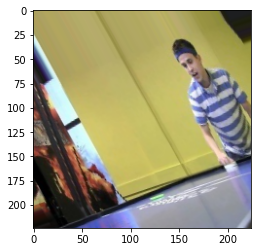

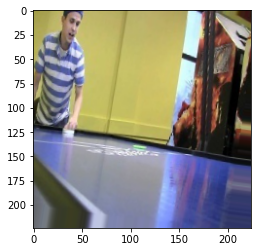

In [27]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

from tensorflow.keras.preprocessing import image
img = image.load_img('/Users/vijay/Downloads/sports/train/air hockey/001.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()        

In [28]:
# Add droput layer
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 128)     

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [30]:
a = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [31]:
train=a.flow_from_directory(directory='/Users/vijay/Downloads/sports/train',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 13572 images belonging to 100 classes.


In [32]:
for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [33]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
# Validation data shouldnot be augmented
valid=valid_datagen.flow_from_directory(directory='/Users/vijay/Downloads/sports/valid',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')


Found 500 images belonging to 100 classes.


In [35]:
for data_batch, labels_batch in valid:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [36]:
history = model.fit(train,steps_per_epoch=150,epochs=100,validation_data=valid)

Epoch 1/100
150/150 [==============================] - 160s 1s/step - loss: 4.7614 - accuracy: 0.0133 - val_loss: 4.5718 - val_accuracy: 0.0160
Epoch 2/100
150/150 [==============================] - 159s 1s/step - loss: 4.5451 - accuracy: 0.0253 - val_loss: 4.5205 - val_accuracy: 0.0240
Epoch 3/100
150/150 [==============================] - 178s 1s/step - loss: 4.4805 - accuracy: 0.0320 - val_loss: 4.4003 - val_accuracy: 0.0280
Epoch 4/100
150/150 [==============================] - 220s 1s/step - loss: 4.3082 - accuracy: 0.0427 - val_loss: 4.1805 - val_accuracy: 0.0420
Epoch 5/100
150/150 [==============================] - 186s 1s/step - loss: 4.1812 - accuracy: 0.0547 - val_loss: 4.0107 - val_accuracy: 0.0660
Epoch 6/100
150/150 [==============================] - 185s 1s/step - loss: 4.0460 - accuracy: 0.0733 - val_loss: 4.1575 - val_accuracy: 0.0920
Epoch 7/100
150/150 [==============================] - 162s 1s/step - loss: 3.9299 - accuracy: 0.0945 - val_loss: 4.2521 - val_accuracy:

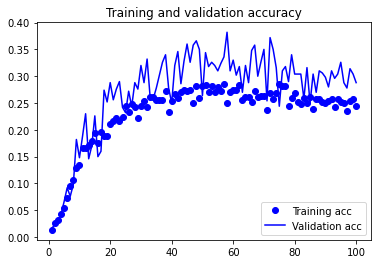

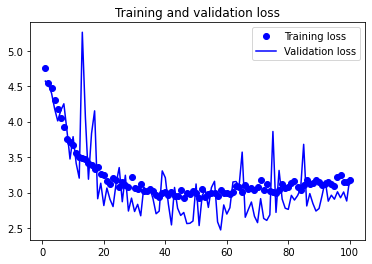

In [37]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()